<a href="https://colab.research.google.com/github/m-sukumar/CRAFT-pytorch/blob/master/LendingClub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('loan.csv')
df.head()

C:\Users\sukumar\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [ ]:
df.int_rate=df.int_rate.apply(lambda x: float(x.strip('%')))


(39717, 2)


<AxesSubplot:>

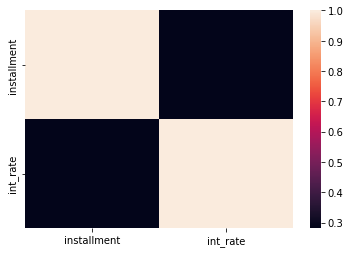

In [ ]:
test=df[['installment','int_rate']]
print(test.shape)
sns.heatmap(data=test.corr())

[[-1.24014354 -0.58294146  0.96665227  0.89952984  0.29183897 -1.26230231
  -0.84270673 -0.04534905  0.97398215  1.86879225  0.63146632 -1.65369298]
 [-0.65994972 -0.28995601  0.87245436  1.36428269 -0.85007878 -0.81754444
  -0.43515075 -0.83766946 -0.16568606  0.08590509 -1.46957265 -0.09231008]
 [-1.60564071  0.6770716  -0.69128858 -1.49455253 -0.4344529  -0.18619284
  -1.02427677 -2.73245751 -1.21920461  0.50304589 -0.28494779  0.79142512]
 [-1.73602219  0.73700336 -0.44109697 -0.1195793   0.24842078  1.5598039
   0.0811448   0.75372601 -0.48195489  1.1991117  -0.47227734  0.36933587]
 [-1.18695462 -1.34008836 -0.84259762 -0.17331007  1.50802965 -1.89384514
  -0.91592035  1.37675969  0.39611272  1.25083593  0.05583765 -0.68998266]
 [ 1.44314982  0.91873989  2.87956271  1.83400325  1.10325467  0.48552627
   0.18846231 -0.51538157 -1.36287639  0.13881888 -0.86656348  0.12768672]
 [ 0.02872044  0.67691766 -1.25689964 -0.49491072  0.38885302 -0.42518572
   0.09946068  3.70188862  0.3167

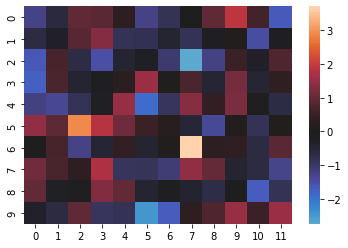

In [ ]:
normal_data = np.random.randn(10, 12)
print(normal_data)
ax = sns.heatmap(normal_data, center=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(75), int64(13), object(23)
memory usage: 33.6+ MB


In [ ]:
df.value_counts()

Series([], dtype: int64)

In [ ]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [ ]:
df.loan_amnt.value_counts()

10000    2833
12000    2334
5000     2051
6000     1908
15000    1895
         ... 
12525       1
16675       1
6175        1
22300       1
28750       1
Name: loan_amnt, Length: 885, dtype: int64

In [ ]:
t=df.isnull().sum()

In [ ]:
(t==39717).sum()

54

In [ ]:
t.info()

AttributeError: 'Series' object has no attribute 'info'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(75), int64(13), object(23)
memory usage: 33.6+ MB


In [ ]:
df.dtypes 

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [ ]:
df.drop(df.isnull().sum()==df.shape[0])

KeyError: '[False False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False False False False False False False False False False False False\n False False  True False False  True  True  True False  True  True  True\n  True  True  True  True  True  True  True  True  True  True  True  True\n  True  True  True  True  True  True False False  True  True  True  True\n  True  True  True  True  True  True  True  True  True  True  True  True\n  True  True  True  True  True  True  True  True  True False False  True\n  True  True  True] not found in axis'

In [ ]:
df.shape[0]

39717

In [ ]:
?df.drop

In [ ]:
[df.columns[df.isnull().sum()!=df.shape[0]]]

[Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
        'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
        'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
        'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
        'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
        'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
        'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
        'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
        'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
        'total_rec_int', 'total_rec_late_fee', 'recoveries',
        'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
        'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
        'policy_code', 'application_type', 'acc_now_delinq',
        'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies'

In [ ]:
df1=df[df.columns[df.isnull().sum()!=df.shape[0]]]

In [ ]:
df1.shape

(39717, 57)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [ ]:
pd.set_option('display.max_columns',111)
df1[df1.next_pymnt_d.isnull()].head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,NaN,NaN,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,NaN,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [ ]:
df1.desc

0          Borrower added on 12/22/11 > I need to upgra...
1          Borrower added on 12/22/11 > I plan to use t...
2                                                      NaN
3          Borrower added on 12/21/11 > to pay for prop...
4          Borrower added on 12/21/11 > I plan on combi...
                               ...                        
39712    Our current gutter system on our home is old a...
39713    The rate of interest and fees incurred by carr...
39714                                                  NaN
39715                                                  NaN
39716    I plan to consolidate over $7,000 of debt: a c...
Name: desc, Length: 39717, dtype: object

In [ ]:
df1.application_type.value_counts()

INDIVIDUAL    39717
Name: application_type, dtype: int64

In [ ]:
df1.columns[df1.nunique()!=1]

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
df1=df1[df1.columns[df1.nunique()!=1]]

In [ ]:
df1.nunique()

id                         39717
member_id                  39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_title                  28820
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
url                        39717
desc                       26527
purpose                       14
title                      19615
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
mths_since_last_delinq        95
mths_since_last_record       111
open_acc                      40
pub_rec   

In [ ]:
df1

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,0.00,0.00,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,NaN,Jun-07,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid

In [ ]:
df1.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [ ]:
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [ ]:
df1.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [ ]:
df1[df1.loan_status=='Charged Off'].head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.0,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.1100,Apr-13,119.66,NaN,Sep-13,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I own a small h...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,Apr-04,2,NaN,NaN,11,0,5210,32.60%,13,0.0,0.0,646.02,646.02,162.02,294.94,0.0,189.06,2.0900,Apr-12,152.39,NaN,Aug-12,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.,774xx,TX,18.08,0,Sep-04,0,NaN,NaN,2,0,9279,36.50%,3,0.0,0.0,1476.19,1469.34,673.48,533.42,0.0,269.29,2.5200,Nov-12,121.45,NaN,Mar-13,0.0
12,1064687,1298717,9000,9000,9000.0,36 months,13.49,305.38,C,C1,Va. Dept of Conservation/Recreation,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/15/11 > Plan to pay off...,debt_consolidation,freedom,245xx,VA,10.08,0,Apr-04,1,NaN,NaN,4,0,10452,91.70%,9,0.0,0.0,2270.70,2270.70,1256.14,570.26,0.0,444.30,4.1600,Jul-12,305.38,NaN,Nov-12,0.0
14,1069057,1303503,10000,10000,10000.0,36 months,10.65,325.74,B,B2,SFMTA,3 years,RENT,100000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Other Loan,951xx,CA,7.06,0,May-91,2,NaN,NaN,14,0,11997,55.50%,29,0.0,0.0,7471.99,7471.99,5433.47,1393.42,0.0,645.10,6.3145,Oct-13,325.74,NaN,Mar-14,0.0


In [ ]:
df_defaulters=df1[df1.loan_status=='Charged Off']

In [ ]:
df_defaulters.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
url                         object
desc                        object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
mths_since_last_delinq     float64
mths_since_last_reco

In [ ]:
df_defaulters[df_defaulters.total_rec_prncp==0].head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
26,1069800,1304679,15000,15000,8725.0,36 months,14.27,514.64,C,C2,nyc transit,9 years,RENT,60000.0,Not Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/15/11 > looking to cons...,debt_consolidation,consolidation,103xx,NY,15.22,0,Oct-03,1,NaN,NaN,7,0,5872,57.60%,11,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.000,NaN,0.0,NaN,May-16,0.0
2724,1032519,1262161,8000,8000,3975.0,36 months,14.65,275.96,C,C3,Southern Felt,10+ years,RENT,72000.0,Source Verified,Nov-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 11/18/11 > Debt Consolidat...,debt_consolidation,bebt consolidation,278xx,NC,22.28,0,Nov-97,1,NaN,NaN,10,0,32955,85.80%,31,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.000,NaN,0.0,NaN,May-16,0.0
3613,1016039,1243723,6400,6400,6400.0,60 months,18.25,163.39,D,D5,akrons children hospitial,5 years,RENT,33000.0,Source Verified,Nov-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,loan,445xx,OH,9.05,0,Jun-06,3,25.0,NaN,4,0,2237,60.50%,6,0.0,0.0,366.75,366.75,0.0,0.0,0.0,366.75,66.015,NaN,0.0,NaN,Apr-12,0.0
3985,1009833,1236591,18000,18000,18000.0,60 months,19.03,467.23,E,E2,ZIMFA INC,4 years,RENT,36000.0,Verified,Nov-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 11/01/11 > pls make the fu...,debt_consolidation,debtconsolidation,061xx,CT,5.43,0,Aug-08,1,NaN,NaN,13,0,4545,18.60%,17,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.000,NaN,0.0,NaN,Apr-16,0.0
4206,1006579,1232989,1800,1800,1800.0,36 months,8.90,57.16,A,A5,Hospira worldwide,9 years,RENT,50400.0,Not Verified,Nov-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 10/28/11 > I need this loa...,wedding,Wedding,917xx,CA,2.64,0,Oct-98,1,NaN,NaN,3,0,1930,16.10%,10,0.0,0.0,1800.00,1800.00,0.0,0.0,0.0,1800.00,0.000,NaN,0.0,NaN,May-16,0.0


In [ ]:
len(df.columns)

111

In [ ]:
df_defaulters.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
id,1.000000,0.994192,0.153415,0.167022,0.310973,0.196032,0.083107,-0.011801,0.111235,0.002086,-0.062355,0.111450,0.677610,0.018655,-0.042360,-0.017684,0.032632,NaN,NaN,0.130110,0.221536,0.054958,0.208318,-0.093661,0.065405,-0.050719,0.025868,-0.026409
member_id,0.994192,1.000000,0.148485,0.161690,0.319364,0.197176,0.071906,-0.013352,0.111183,0.002918,-0.065406,0.117480,0.697226,0.012821,-0.039820,-0.024654,0.031458,NaN,NaN,0.127992,0.227669,0.052423,0.208931,-0.096233,0.062211,-0.054522,0.021893,-0.022869
loan_amnt,0.153415,0.148485,1.000000,0.979134,0.907129,0.351216,0.925911,0.352359,0.063872,-0.029843,0.007480,0.012800,-0.045680,0.184323,-0.047690,0.313101,0.283738,NaN,NaN,0.680814,0.643174,0.551302,0.699167,0.087517,0.310185,0.157602,0.332981,-0.028286
funded_amnt,0.167022,0.161690,0.979134,1.000000,0.926996,0.353906,0.953826,0.347131,0.060861,-0.027366,0.007942,0.015370,-0.065083,0.181439,-0.052527,0.296956,0.275088,NaN,NaN,0.698496,0.660695,0.569719,0.712395,0.094089,0.316077,0.164236,0.338804,-0.033212
funded_amnt_inv,0.310973,0.319364,0.907129,0.926996,1.000000,0.369863,0.858041,0.314505,0.072924,-0.031524,-0.018395,0.084012,0.444677,0.154601,-0.052717,0.254045,0.252796,NaN,NaN,0.685354,0.726049,0.550112,0.718712,0.067972,0.301537,0.138645,0.291813,-0.036099
int_rate,0.196032,0.197176,0.351216,0.353906,0.369863,1.000000,0.327909,0.132252,0.040607,0.119643,0.058475,-0.015715,0.354372,0.038607,0.079085,0.075878,-0.008655,NaN,NaN,0.264457,0.277016,0.070138,0.468654,0.055287,0.159769,0.072141,0.093077,0.074839
installment,0.083107,0.071906,0.925911,0.953826,0.858041,0.327909,1.000000,0.358656,0.042358,-0.012530,0.018359,-0.008375,-0.149253,0.179676,-0.041068,0.299930,0.251874,NaN,NaN,0.666864,0.616589,0.577424,0.628887,0.119871,0.300368,0.185040,0.350428,-0.025611
annual_inc,-0.011801,-0.013352,0.352359,0.347131,0.314505,0.132252,0.358656,1.000000,-0.089725,0.021765,0.037303,-0.024100,-0.058523,0.212320,-0.006679,0.379449,0.287343,NaN,NaN,0.279975,0.262635,0.239091,0.263186,0.062817,0.134942,0.087584,0.130603,-0.004122
dti,0.111235,0.111183,0.063872,0.060861,0.072924,0.040607,0.042358,-0.089725,1.000000,-0.068839,-0.028810,0.075373,0.179213,0.299230,0.007990,0.239712,0.272802,NaN,NaN,0.043360,0.049070,0.014944,0.068741,-0.037967,0.030623,0.006795,0.000367,0.018904
delinq_2yrs,0.002086,0.002918,-0.029843,-0.027366,-0.031524,0.119643,-0.012530,0.021765,-0.068839,1.000000,-0.011454,-0.583190,-0.077147,-0.018495,-0.001608,-0.081994,0.059658,NaN,NaN,-0.016056,-0.022492,-0.034993,0.002871,0.029122,0.014393,0.024517,-0.000316,0.002453


In [ ]:
df.addr_state.value_counts()

CA    7099
NY    3812
FL    2866
TX    2727
NJ    1850
IL    1525
PA    1517
VA    1407
GA    1398
MA    1340
OH    1223
MD    1049
AZ     879
WA     840
CO     792
NC     788
CT     751
MI     720
MO     686
MN     615
NV     497
SC     472
WI     460
AL     452
OR     451
LA     436
KY     325
OK     299
KS     271
UT     258
AR     245
DC     214
RI     198
NM     189
WV     177
HI     174
NH     171
DE     114
MT      85
WY      83
AK      80
SD      64
VT      54
MS      19
TN      17
IN       9
ID       6
NE       5
IA       5
ME       3
Name: addr_state, dtype: int64

In [ ]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
len(df_defaulters.addr_state.value_counts())

47

In [ ]:
df.loan_status

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4            Current
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 39717, dtype: object

In [ ]:
len(df.addr_state.value_counts())

50

In [ ]:
df.addr_state.value_counts()==0

CA    False
NY    False
FL    False
TX    False
NJ    False
IL    False
PA    False
VA    False
GA    False
MA    False
OH    False
MD    False
AZ    False
WA    False
CO    False
NC    False
CT    False
MI    False
MO    False
MN    False
NV    False
SC    False
WI    False
AL    False
OR    False
LA    False
KY    False
OK    False
KS    False
UT    False
AR    False
DC    False
RI    False
NM    False
WV    False
HI    False
NH    False
DE    False
MT    False
WY    False
AK    False
SD    False
VT    False
MS    False
TN    False
IN    False
ID    False
NE    False
IA    False
ME    False
Name: addr_state, dtype: bool

In [ ]:
df.addr_state.unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [ ]:
df_defaulters.addr_state.unique()

array(['GA', 'CA', 'TX', 'VA', 'FL', 'NY', 'PA', 'OH', 'IL', 'WA', 'MN',
       'AK', 'OR', 'AZ', 'WI', 'NC', 'CO', 'MO', 'WV', 'NV', 'SC', 'RI',
       'MA', 'KY', 'HI', 'NJ', 'MT', 'MI', 'SD', 'DC', 'OK', 'VT', 'NM',
       'MD', 'AL', 'KS', 'UT', 'LA', 'AR', 'CT', 'NH', 'DE', 'WY', 'MS',
       'TN', 'ID', 'NE'], dtype=object)

In [ ]:
df_defaulters.addr_state.unique()

array(['GA', 'CA', 'TX', 'VA', 'FL', 'NY', 'PA', 'OH', 'IL', 'WA', 'MN',
       'AK', 'OR', 'AZ', 'WI', 'NC', 'CO', 'MO', 'WV', 'NV', 'SC', 'RI',
       'MA', 'KY', 'HI', 'NJ', 'MT', 'MI', 'SD', 'DC', 'OK', 'VT', 'NM',
       'MD', 'AL', 'KS', 'UT', 'LA', 'AR', 'CT', 'NH', 'DE', 'WY', 'MS',
       'TN', 'ID', 'NE'], dtype=object)

In [ ]:
total=df.addr_state.value_counts()
total_default=df_defaulters.addr_state.value_counts()
total.name='total'
total_default.name='total_default'
total.describe()

count      50.000000
mean      794.340000
std      1212.089284
min         3.000000
25%       128.250000
50%       443.500000
75%       869.250000
max      7099.000000
Name: total, dtype: float64

In [ ]:
state_default=pd.concat([total,total_default],axis=1)
state_default

,total,total_default
CA,7099,1125.0
NY,3812,495.0
FL,2866,504.0
TX,2727,316.0
NJ,1850,278.0
IL,1525,197.0
PA,1517,180.0
VA,1407,177.0
GA,1398,215.0
MA,1340,159.0


In [ ]:
state_default.dropna()

,total,total_default
CA,7099,1125.0
NY,3812,495.0
FL,2866,504.0
TX,2727,316.0
NJ,1850,278.0
IL,1525,197.0
PA,1517,180.0
VA,1407,177.0
GA,1398,215.0
MA,1340,159.0


In [ ]:
state_default=state_default.dropna()

In [ ]:
state_default['per_def']=state_default.total_default/state_default.total

C:\Users\sukumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
state_default.sort_values('per_def',ascending=False)

,total,total_default,per_def
NE,5,3.0,0.600000
NV,497,108.0,0.217304
SD,64,12.0,0.187500
AK,80,15.0,0.187500
FL,2866,504.0,0.175855
ID,6,1.0,0.166667
MO,686,114.0,0.166181
HI,174,28.0,0.160920
NM,189,30.0,0.158730
CA,7099,1125.0,0.158473


In [ ]:
df['loan_status_state']=df.loan_status.apply(lambda x: 1 if x=='Charged Off' else 0)

In [ ]:
df[~df.addr_state.isnull()].groupby(df.addr_state).sum().head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status_state
addr_state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,58506883,72641244,1039300,1018950,942667.687741,1020.65,30532.43,6311209.04,1188.66,15,67,749.0,139.0,744,3,1303012,1820,9532.97,9529.1,1.117984e+06,1030137.38,882706.65,223925.94,362.847697,10988.27,1381.6091,267526.01,0.0,0.0,80,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,15


In [ ]:
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [ ]:
df['loan_status_state'].value_counts()

0    34090
1     5627
Name: loan_status_state, dtype: int64

<AxesSubplot:>

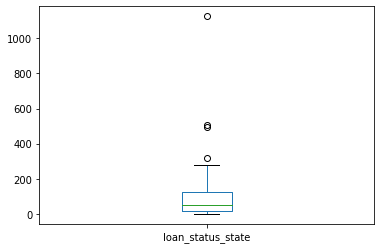

In [ ]:
df[~df.addr_state.isnull()].groupby(df.addr_state).sum()['loan_status_state'].plot.box()

In [ ]:
df[~df.addr_state.isnull()].groupby('addr_state')['loan_status'].value_counts()

addr_state  loan_status
AK          Fully Paid      63
            Charged Off     15
            Current          2
AL          Fully Paid     381
            Charged Off     54
                          ... 
WV          Charged Off     21
            Current          5
WY          Fully Paid      76
            Charged Off      4
            Current          3
Name: loan_status, Length: 140, dtype: int64

In [ ]:
df[~df.addr_state.isnull()]['loan_status_state']

0        0
1        1
2        0
3        0
4        0
        ..
39712    0
39713    0
39714    0
39715    0
39716    0
Name: loan_status_state, Length: 39717, dtype: int64

<AxesSubplot:>

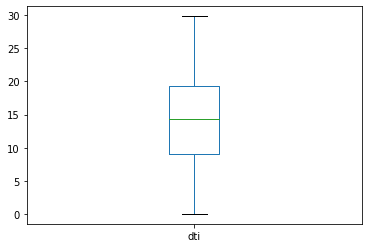

In [ ]:
df_defaulters.dti.plot.box()

<AxesSubplot:>

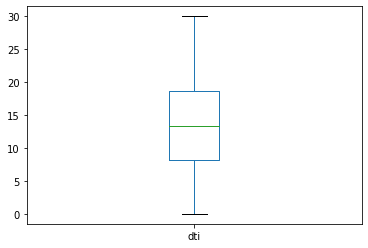

In [ ]:
df.dti.plot.box()

<AxesSubplot:>

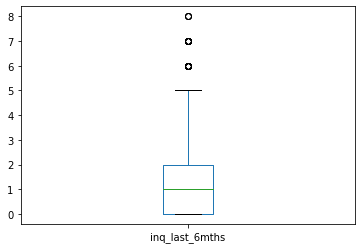

In [ ]:
df_defaulters.inq_last_6mths.plot.box()

<AxesSubplot:>

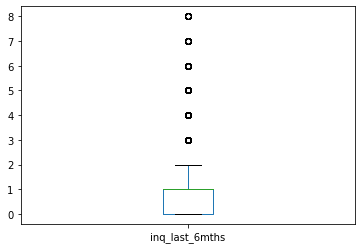

In [ ]:
df.inq_last_6mths.plot.box()

In [ ]:
df_paid=df1[df1.loan_status=='Fully Paid']

In [ ]:
df1.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

<AxesSubplot:>

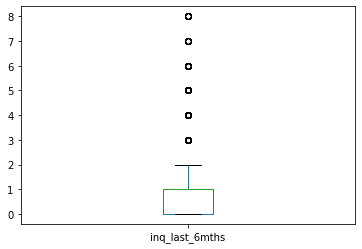

In [ ]:
df_paid.inq_last_6mths.plot.box()

In [ ]:
df.groupby('loan_status').inq_last_6mths

<AxesSubplot:xlabel='loan_status', ylabel='inq_last_6mths'>

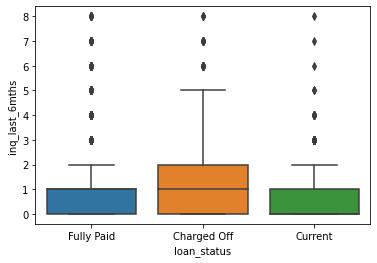

In [ ]:
sns.boxplot(x=df.loan_status,y=df.inq_last_6mths)

<AxesSubplot:xlabel='loan_status', ylabel='inq_last_12m'>

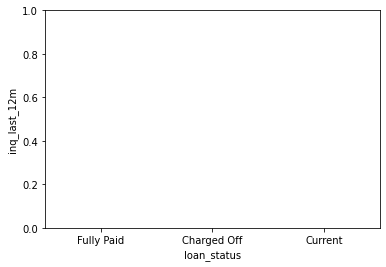

In [ ]:
sns.boxplot(x=df.loan_status,y=df.inq_last_12m)

<AxesSubplot:xlabel='loan_status', ylabel='home_ownership'>

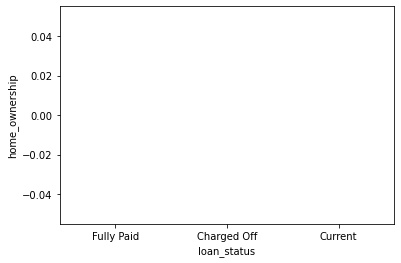

In [ ]:
sns.barplot(x=df.loan_status,y=df.home_ownership.value_counts())

<AxesSubplot:xlabel='home_ownership,loan_status'>

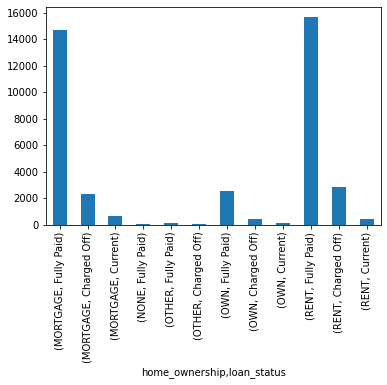

In [ ]:
df.groupby('home_ownership')['loan_status'].value_counts().plot(kind='bar',stacked=True)

In [ ]:
df_test=pd.pivot_table(data=df,index='loan_status',values='installment',columns='home_ownership',aggfunc='count')
df_test

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
loan_status,,,,,
Charged Off,2327.0,NaN,18.0,443.0,2839.0
Current,638.0,NaN,NaN,83.0,419.0
Fully Paid,14694.0,3.0,80.0,2532.0,15641.0


<AxesSubplot:xlabel='home_ownership', ylabel='loan_status'>

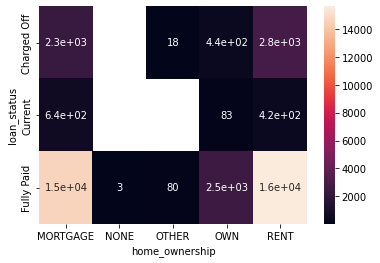

In [ ]:
sns.heatmap(data=df_test,annot=True)

In [ ]:
df1.columns

In [ ]:
df[df['loan_status']=='Fully Paid'][['loan_amnt', 'last_pymnt_d','next_pymnt_d','issue_d','installment','term']]


In [ ]:
df[['loan_amnt', 'last_pymnt_d','term']]

In [ ]:
df.head(1)

In [ ]:
df1.columns

In [ ]:
df1.pub_rec.value_counts()

In [ ]:
(df_defaulters.pub_rec>2).sum()

In [ ]:
df.num_accts_ever_120_pd.value_counts()

In [ ]:
df1.columns

In [ ]:
df1.groupby('loan_status').purpose.value_counts()

In [ ]:
df1[df1.loan_status=='Charged Off'].purpose.value_counts()/(df1.loan_status=='Charged Off').sum()*100

In [ ]:
(df1.loan_status=='Charged Off').sum()

In [ ]:
df1[df1.loan_status=='Fully Paid'].purpose.value_counts()/(df1.loan_status=='Fully Paid').sum()*100

In [ ]:
df1.columns

In [ ]:
df1.groupby('loan_status').verification_status.value_counts().plot.bar()

In [ ]:
df1.pivot_table(index='verification_status',columns='loan_status',values='')

In [ ]:
df1.columns

In [ ]:
((df1.annual_inc/10-df1.installment*12)<0 ).sum()

In [ ]:
df1.annual_inc.corr(df1.installment)

In [ ]:
sns.histplot(df1.annual_inc)

In [ ]:
df1.annual_inc.plot.box()

In [ ]:
df1[df1.annual_inc<500000].annual_inc.plot.box()

In [ ]:
df1.annual_inc.quantile(0.90)

In [ ]:
df1.annual_inc.quantile(.95)

In [ ]:
df1[df1.annual_inc<df1.annual_inc.quantile(.95)].annual_inc.plot.box()

In [ ]:
df_aincf=df1[df1.annual_inc<df1.annual_inc.quantile(.95)]

In [ ]:
df_aincf.annual_inc.corr(df_aincf.installment)

In [ ]:
df_aincf.corr()

In [ ]:
df1['term']=df1.term.apply(lambda x: int(x[0:3]))

In [ ]:
df1['int_rate']=df1.int_rate.apply(lambda x: float(x.strip('%')))

In [ ]:
all_columns=df1.columns
int_columns=[x  for x in all_columns if df1[x].dtype == 'Int64'  ]
float_columns=[x  for x in all_columns if df1[x].dtype == 'Float64'  ]
numeric_columns=int_columns+float_columns
print(numeric_columns)

In [ ]:
[x if df1[x].dtype == 'Int64' else False  for x in all_columns   ]

In [ ]:
sns.heatmap(data=df1)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,7))

In [ ]:
plt.figure(figsize=(14,7))

plt.show()

In [ ]:
df1.installment

In [ ]:
df1.loan_amnt.corr(df1.installment)

In [ ]:
test=df1[['installment','int_rate']]
sns.heatmap(test)